# Temporal resampling of time series data

[**See `resampling` instructions**](https://datons.craft.me/h3f5pSQSE7l6RW) to complete the following exercises.

## Data

In [1]:
import pandas as pd

df_tsla = pd.read_csv('../../../data/raw/tsla_stock.csv')
df_tsla = df_tsla[['Date', 'Close']]
df_tsla['Close'] = df_tsla['Close'].pct_change().mul(100)
df_tsla = df_tsla.dropna()
df_tsla

,Date,Close
1,2010-06-30,-0.251148
2,2010-07-01,-7.847274
...,...,...
3460,2024-03-28,-2.246571
3461,2024-04-01,-0.324246


## Configure datetime index

### Format datetime column

In [2]:
df_tsla.Date = pd.to_datetime(df_tsla.Date)
df_tsla.Date

1      2010-06-30
2      2010-07-01
          ...    
3460   2024-03-28
3461   2024-04-01
Name: Date, Length: 3461, dtype: datetime64[ns]

### Set datetime column as index

In [3]:
df_tsla.set_index('Date', inplace=True)
df_tsla

,Close
Date,
2010-06-30,-0.251148
2010-07-01,-7.847274
...,...
2024-03-28,-2.246571
2024-04-01,-0.324246


## Monthly resampling

### 1 mathematical operation

- Average by month

In [4]:
df = df_tsla.resample(rule='ME').mean()
df

,Close
Date,
2010-06-30,-0.251148
2010-07-31,-0.634542
...,...
2024-03-31,-0.645118
2024-04-30,-0.324246


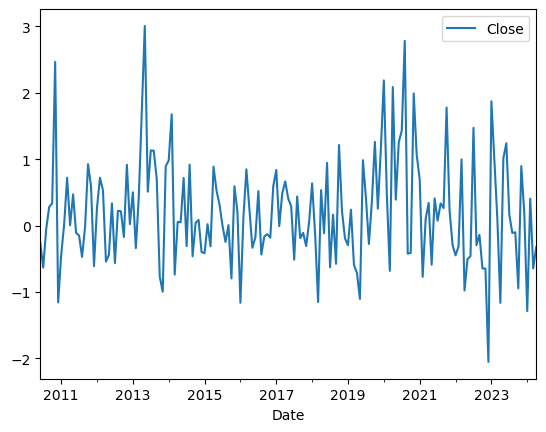

In [5]:
df.plot();

---

### 2 mathematical operations

- Monthly aggregation of minimum and maximum values

In [6]:
df = df_tsla.resample(rule='ME').agg(['min', 'max'])
df

Close           
                  min        max
Date                            
2010-06-30  -0.251148  -0.251148
2010-07-31 -16.093748  10.506363
...               ...        ...
2024-03-31  -7.155547   6.254200
2024-04-30  -0.324246  -0.324246

[167 rows x 2 columns]

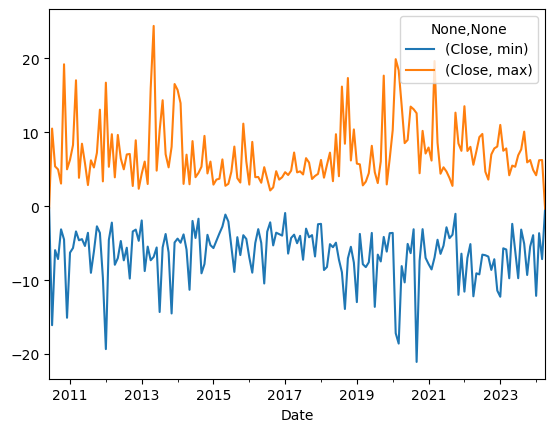

In [7]:
df.plot();

## Quarter maximum and minimum

In [8]:
df = df_tsla.resample(rule='QE').agg(['min', 'max'])
df

Close           
                  min        max
Date                            
2010-06-30  -0.251148  -0.251148
2010-09-30 -16.093748  10.506363
2010-12-31 -15.088087  19.204203
2011-03-31  -6.279230  17.039199
2011-06-30  -5.374914   8.458108
2011-09-30  -9.007339   6.213281
2011-12-31  -9.651947  13.061651
2012-03-31 -19.327435  16.717859
2012-06-30  -7.918978   9.647363
2012-09-30  -9.784733   7.074677
2012-12-31  -4.679518   8.921158
2013-03-31  -8.770096   6.047542
2013-06-30  -7.307174  24.395076
2013-09-30 -14.309290  14.341062
2013-12-31 -14.507091  16.533784
2014-03-31  -4.938635  15.738480
2014-06-30 -11.303698   8.812129
2014-09-30  -9.075930   5.346687
2014-12-31  -7.820713   9.518661
2015-03-31  -5.659734   3.720588
2015-06-30  -2.753284   6.335084
2015-09-30  -8.884613   8.072407
2015-12-31  -6.606755  11.173506
2016-03-31  -8.985240   8.706566
2016-06-30 -10.450342   5.283668
2016-09-30  -5.301630   3.690381
2016-12-31  -3.970440   4.739499
2017-03-31  -6.405612   4.805628
2017-06-30  -5.002899   7.265539
2017-09-30  -7.240087   6.505265
2017-12-31  -6.795812   4.372799
2018-03-31  -8.628986   6.263822
2018-06-30  -5.545416   9.744784
2018-09-30 -13.901537  16.188013
2018-12-31  -7.624232  17.347133
2019-03-31 -12.971116   5.769739
2019-06-30  -8.234816   8.174562
2019-09-30 -13.613708   6.060346
2019-12-31  -6.140963  17.669232
2020-03-31 -18.577806  19.894859
2020-06-30 -10.303371  13.603839
2020-09-30 -21.062824  13.479394
2020-12-31  -7.379069  10.196776
2021-03-31  -8.549846  19.641208
2021-06-30  -6.444373   8.595690
2021-09-30  -4.322550   4.694119
2021-12-31 -11.990303  12.661598
2022-03-31 -11.554176  13.531668
2022-06-30 -12.184122   9.354435
2022-09-30  -6.810050   9.780471
2022-12-31 -11.408853   8.082691
2023-03-31 -12.242249  11.000180
2023-06-30  -9.745828   5.496278
2023-09-30  -9.737010  10.092550
2023-12-31  -9.300310   6.248172
2024-03-31 -12.125293   6.254200
2024-06-30  -0.324246  -0.324246

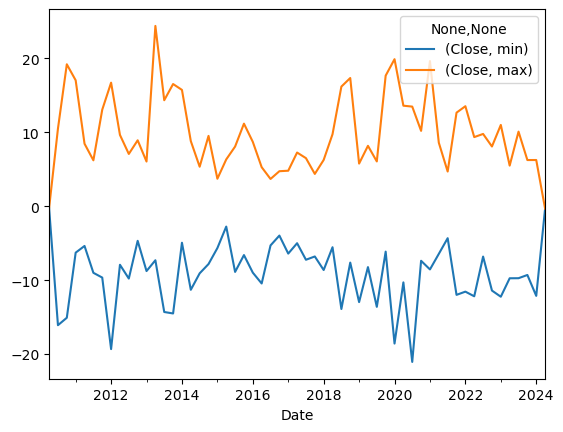

In [9]:
df.plot();

## Real life applications

### Stock market data

[Reporting annual cumulative returns on multiple assets in Python](https://datons.ai/processing-annual-financial-reports-on-multiple-assets-in-python/)